In [1]:
import pandas as pd, numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
import os

warnings.filterwarnings('ignore')
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,8)

In [2]:
data = pd.read_csv('P4-Section6-Homework-Dataset.csv', encoding = 'latin1')

In [3]:
data.info()
data.columns = ['Day', 'Director', 'Genre', 'Title', 'Date', 'Studio', 'AdjustedGross','Budget','Gross','IRating',
               'MRating','Overseas','OversearPercent','Profit', 'ProfitPercent', 'Runtime', 'US', 'GrossUS']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608 entries, 0 to 607
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Day of Week             608 non-null    object 
 1   Director                608 non-null    object 
 2   Genre                   608 non-null    object 
 3   Movie Title             608 non-null    object 
 4   Release Date            608 non-null    object 
 5   Studio                  608 non-null    object 
 6   Adjusted Gross ($mill)  608 non-null    object 
 7   Budget ($mill)          608 non-null    float64
 8   Gross ($mill)           608 non-null    object 
 9   IMDb Rating             608 non-null    float64
 10  MovieLens Rating        608 non-null    float64
 11  Overseas ($mill)        608 non-null    object 
 12  Overseas%               608 non-null    float64
 13  Profit ($mill)          608 non-null    object 
 14  Profit%                 608 non-null    fl

In [4]:
data.head()

,Day,Director,Genre,Title,Date,Studio,AdjustedGross,Budget,Gross,IRating,MRating,Overseas,OversearPercent,Profit,ProfitPercent,Runtime,US,GrossUS
0,Friday,Brad Bird,action,Tomorrowland,22/05/2015,Buena Vista Studios,202.1,170.0,202.1,6.7,3.26,111.9,55.4,32.1,18.9,130,90.2,44.6
1,Friday,Scott Waugh,action,Need for Speed,14/03/2014,Buena Vista Studios,204.2,66.0,203.3,6.6,2.97,159.7,78.6,137.3,208.0,132,43.6,21.4
2,Friday,Patrick Hughes,action,The Expendables 3,15/08/2014,Lionsgate,207.1,100.0,206.2,6.1,2.93,166.9,80.9,106.2,106.2,126,39.3,19.1
3,Friday,"Phil Lord, Chris Miller",comedy,21 Jump Street,16/03/2012,Sony,208.8,42.0,201.6,7.2,3.62,63.1,31.3,159.6,380.0,109,138.4,68.7
4,Friday,Roland Emmerich,action,White House Down,28/06/2013,Sony,209.7,150.0,205.4,8.0,3.65,132.3,64.4,55.4,36.9,131,73.1,35.6


In [5]:
data.Genre = data.Genre.astype('category')
data.Studio = data.Studio.astype('category')

In [6]:
subdata_genre = data[(data.Genre == 'action') | (data.Genre == 'comedy') | (data.Genre == 'adventure') | 
               (data.Genre == 'animation') | (data.Genre == 'drama')]
subdata_studio = data[(data.Studio == 'Buena Vista Studios') | (data.Studio == 'Fox') | (data.Studio == 'Sony') | 
               (data.Studio == 'Paramount Pictures') | (data.Studio == 'Universal') | (data.Studio == 'WB')]

In [7]:
print(len(subdata_genre.Genre.unique()))
print(len(subdata_studio.Studio.unique()))

5
6


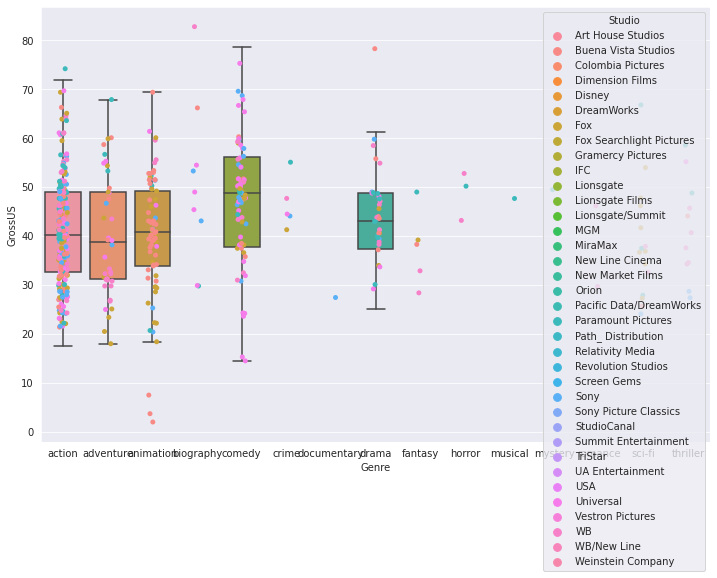

In [11]:
sns.set_style('darkgrid')
p1 = sns.boxplot(y = 'GrossUS', x = 'Genre', data = subdata_genre, showfliers = False, orient='v')
p2 = sns.stripplot(x = 'Genre', y = 'GrossUS', hue = 'Studio', data = subdata_studio)